<a href="https://colab.research.google.com/github/derewor/Housing_data/blob/main/Housing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all required libraries

In [81]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

In [ ]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# read the housing csv file stored in the computer
df = pd.read_csv('/Housing.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# look at the columns by printing the head 2 rows
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [109]:
df['view'].unique()

array([0, 3, 4, 2, 1])

In [ ]:
#correlation between price and number of bedrooms
correlation_price_bedroom = np.corrcoef(df['price'], df['bedrooms'])
correlation_price_bedroom

array([[1.        , 0.30837692],
       [0.30837692, 1.        ]])

In [19]:
percentile_75 = df['price'].quantile(0.75)
percentile_50 = df['price'].quantile(0.50)
percentile_25 = df['price'].quantile(0.25)
median_price = df['price'].median()

In [22]:
#calculate the IQR
IQR = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * IQR
lower_limit = percentile_25 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

1129575.0
-162625.0


In [36]:
#How many houses have a price above the highr IQR limit?
num_outlier_houses = df[df['price']> upper_limit].count()
num_outlier_houses['price']
# what is the percent of outliers out of the total number of houses
percent_outlier = num_outlier_houses['price'] / df.shape[0] * 100
percent_outlier
#The total number of housing costing above the upper limit are more than 5% so can not be excluded.

5.302364317771711

In [41]:
#calculate the standard deviation of price
std_price = df['price'].std()
cuttoff_upper = std_price * 3
cuttoff_upper

1101380.475258167

In [61]:
#subset_outliers = df[df['price']>upper_limit]
# The boxplot below shows that there are ~12 houses which cost extremely high and different from the rest.
# to exclude these prices, the vallues are sorted as follows.
highest_prices = df['price'].sort_values(ascending=False)
highest_prices.head(5)

,price
7252,7700000.0
3914,7062500.0
9254,6885000.0
4411,5570000.0
1448,5350000.0


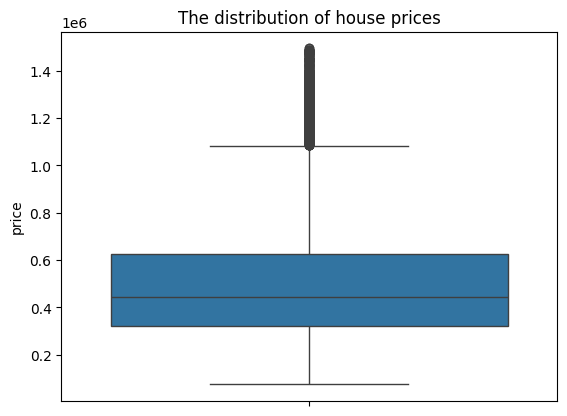

In [88]:
# subset the dataframe for house prices less than 15000000.0
df_selected = df[df['price']<1500000.0]
sns.boxplot(y='price', data=df_selected)
plt.title ('The distribution of house prices')
plt.show()


In [71]:
print(df_selected.shape)
print(df.shape)

(21080, 21)
(21613, 21)


In [ ]:
df_0 = df[df['bedrooms']==0]
df_0.head(1)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000


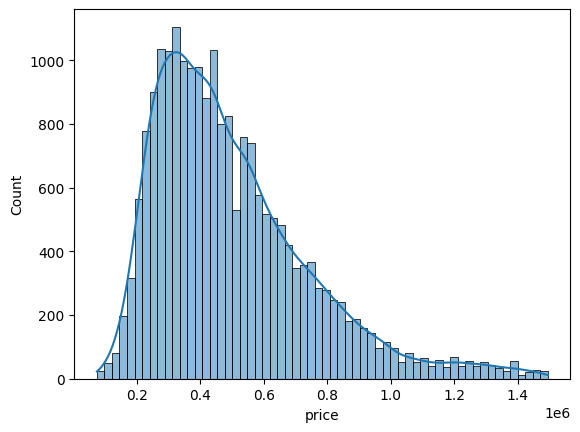

In [76]:
#what is the distribution of house prices
sns.histplot(x='price', kde=True, data=df_selected, bins=60)
plt.show()

In [84]:
# Test if the data is normally distributed.
stat, p = shapiro(df_selected['price'])
print(stat)
print(p)
if p > 0.05:
  print('The print data is normally distributed')
else:
  print('The data is not normally distributed')

0.9124083817250528
5.252484724175355e-75
The data is not normally distributed


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21080.
  res = hypotest_fun_out(*samples, **kwds)


In [73]:
print(df['price'].describe())
print(df_selected['price'].describe())

count    2.161300e+04
mean     5.400886e+05
std      3.671268e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
count    2.108000e+04
mean     5.004728e+05
std      2.467027e+05
min      7.500000e+04
25%      3.199500e+05
50%      4.450000e+05
75%      6.250000e+05
max      1.495000e+06
Name: price, dtype: float64


In [77]:
df_below_1_million = df[df['price']<=1000000.0]
df_above_1_million = df[df['price']> 1000000.0]

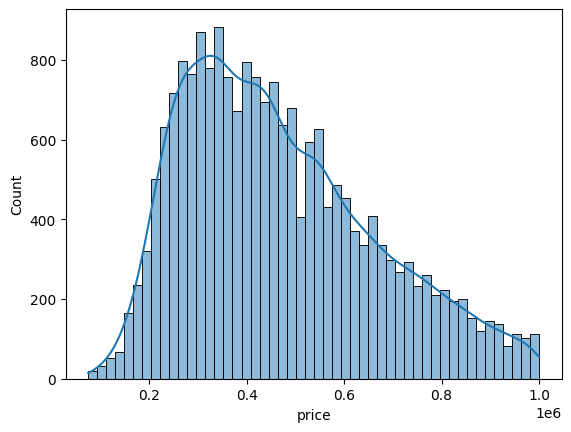

In [79]:
sns.histplot(x='price', data=df_below_1_million, kde=True, bins=50)
plt.show()

In [85]:
# To test if the data is distributed normally.
stat, p = shapiro(df_below_1_million['price'])
print(stat)
print(p)
if p > 0.05:
  print('The print data is normally distributed')
else:
  print('The data is not normally distributed')

0.9581362183564323
5.138659738461508e-59
The data is not normally distributed


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20148.
  res = hypotest_fun_out(*samples, **kwds)


In [86]:
#sns.histplot(x='price', data=df_above_1_million, kde=True, bins=50)
#plt.show()

In [93]:
# what is the correlation between the house prices and number of bedrooms?
correllation_price_bedrooms = np.corrcoef(df_selected['price'], df_selected['bathrooms'])
correllation_price_bedrooms
# The correlation value increase after someoutliers are removed from the original data

array([[1.        , 0.48586361],
       [0.48586361, 1.        ]])

In [95]:
#What is the correlation between the price and view?
correlation_price_view = np.corrcoef(df_selected['price'], df_selected['view'])
correlation_price_view

array([[1.        , 0.30481514],
       [0.30481514, 1.        ]])

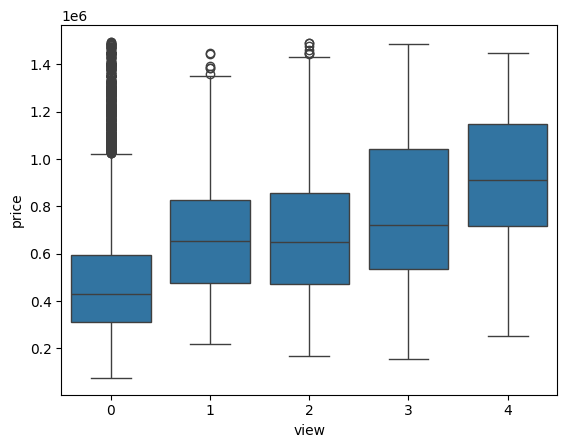

In [98]:
sns.boxplot(x='view', y='price', data=df_selected)
plt.show()

In [105]:
subset_nonzero_view =df[df['view']!=0]
subset_nonzero_view.shape

(2124, 21)

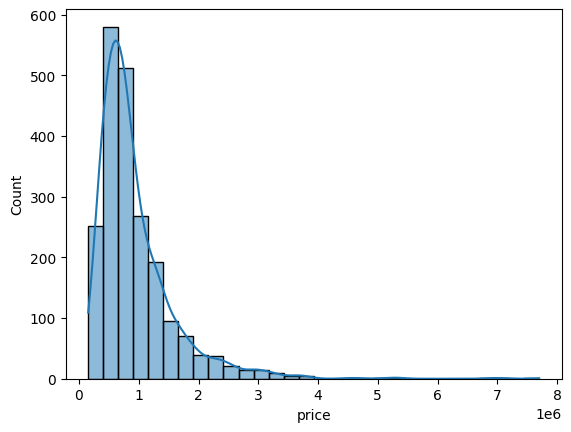

In [106]:
sns.histplot(x='price', data=subset_nonzero_view, kde=True, bins=30)
plt.show()

In [111]:
#model the price of a house based on the view
price_vs_view = ols('price~view', data=df_selected).fit()
price_vs_view.params

,0
Intercept,478891.178487
view,108113.031249


In [112]:
#model the price with zero intercept
price_vs_view = ols('price~view + 0', data=df_selected).fit()
price_vs_view.params

,0
view,290679.988947
